In [1]:
from safep.AFEP_parse import (get_summary_statistics,
                              AFEPArguments,
                              do_general_figures_plot,
                              do_shared_convergence_plot,
                              do_per_lambda_convergence_shared_axes,
                              COLORS)
from safep.fepruns import process_replicas
from IPython.display import Markdown
import matplotlib.pyplot as plt
from pathlib import Path

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************



# User parameters

In [2]:
constants = AFEPArguments(dataroot = Path('.'),
                          replica_pattern = 'Replica?',
                          filename_pattern = '*.fepout',
                          temperature = 303.15,
                          detect_equilibrium = True,
                          make_figures = True)
assert len(constants.replicas) > 0, "ERROR: no such directories found."

itcolors = iter(COLORS)

# Read and plot number of samples after detecting EQ

In [3]:
fepruns = process_replicas(constants, itcolors)

Reading Replica3
Found existing dataframe. Reading.
Reading Replica2
Found existing dataframe. Reading.
Reading Replica1
Found existing dataframe. Reading.


# Plot free energy estimates and hysteresis

In [4]:
toprint, dGs, mean, sterr = get_summary_statistics(constants, fepruns)
Markdown('<strong>{}</strong>'.format(toprint.replace('\n', '<br>')))

<strong>Replica1: ΔG = 0.2±0.0 kcal/mol<br>Replica2: ΔG = 0.2±0.0 kcal/mol<br>Replica3: ΔG = 0.2±0.0 kcal/mol<br><br>mean: 0.20000000000000004 kcal/mol<br>sterr: 0.0 kcal/mol</strong>

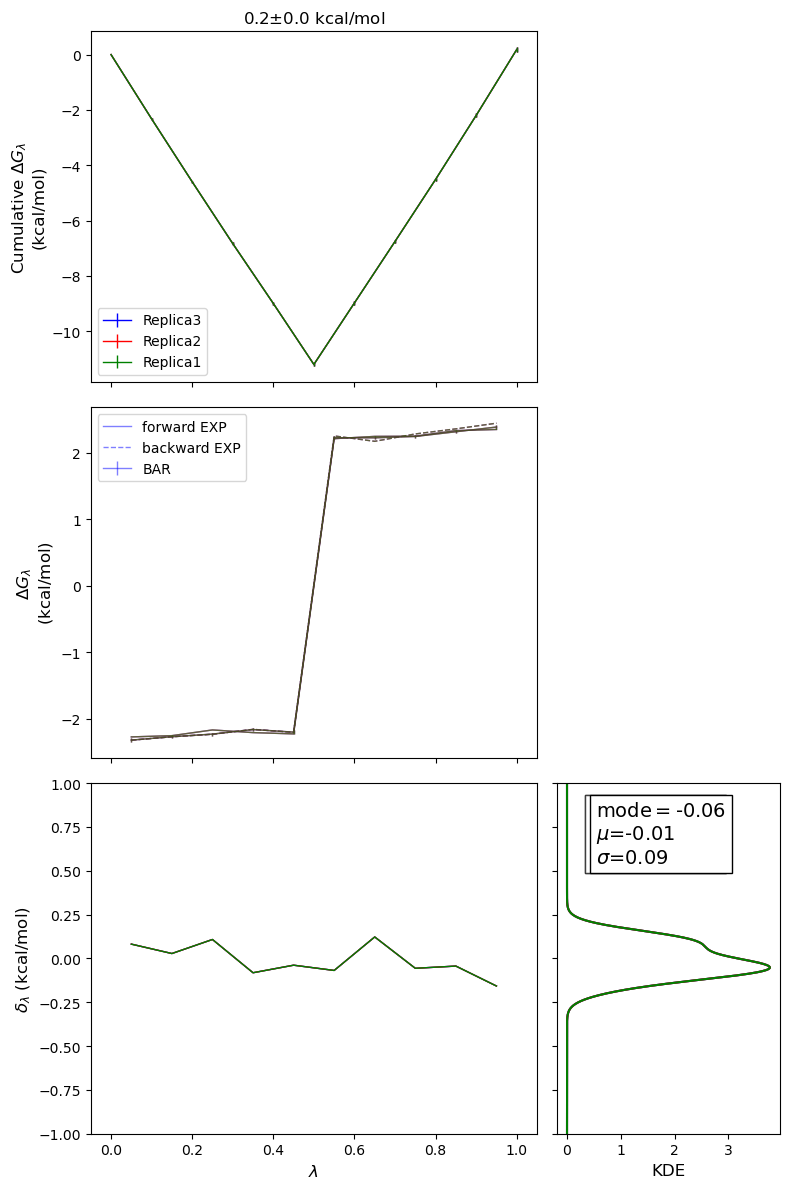

In [5]:
fig, axes = do_general_figures_plot(constants, fepruns, round(mean, 2), sterr)
plt.savefig(constants.dataroot.joinpath('FEP_general_figures.pdf'))

# Additional convergence metrics (forward and reverse cumulative averages):
Plot the estimated total change in free energy as a function of simulation time; contiguous subsets starting at t=0 ("Forward") and t=end ("Reverse")

See Yang, Bitetti-Putzer, & Karplus 2004 https://doi.org/10.1063/1.1638996

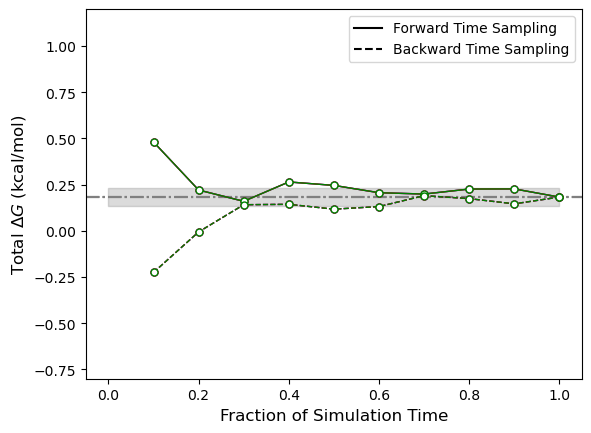

In [6]:
fig, conv_ax = do_shared_convergence_plot(constants, fepruns, dGs)
plt.savefig(constants.dataroot.joinpath('FEP_convergence.pdf'))

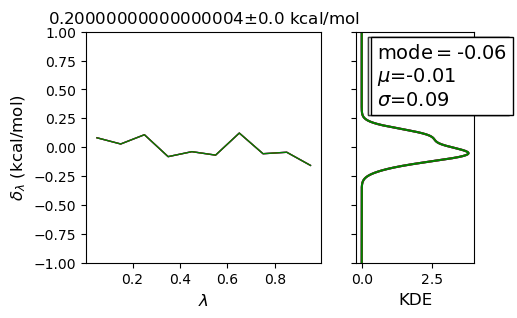

In [7]:
fig, ax = do_per_lambda_convergence_shared_axes(fepruns, mean, sterr)
fig.savefig(constants.dataroot.joinpath('FEP_perLambda_convergence.pdf'))